<a href="https://colab.research.google.com/github/agharbi6/dlaicourse/blob/master/Reinforcement_Learning_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Reinforcement Learning?  
RL is an area of machine learning in which an agent interacts with its environment and builds experience through trial and error. This interaction can be done by performing an action. This action may or may not change the agent's state and results in either a reward or a penalty. The agent therefore attempts to maximize its rewards by observing the outcome of its actions in various states.

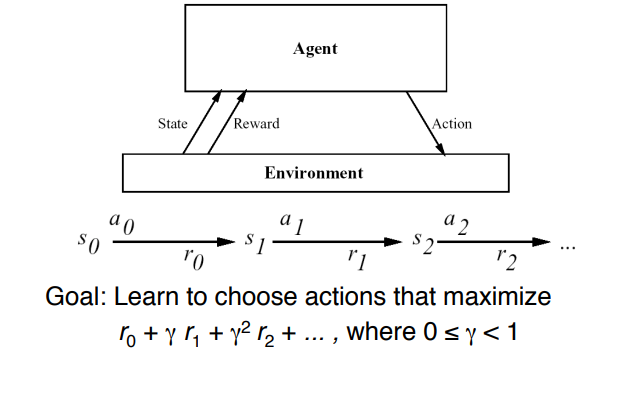

*Image source: CS536 Reinforcement Learning Slides by Wu Littman* 

Applications of reinforcement learning can be found in games, robotics, operations research, multi-agent system, etc. 

Example: Training the best super Mario player [Super Mario](https://www.youtube.com/watch?v=1qa7oRhZvbM)

# Taxonomy of Reinforcement Learning 
There are multiple strategies/algorithms that are used in reinforcement learning. The main two classes are model-based learning and model-free learning algorithms. 

In model-based algorithms, the transitions between states and rewards are approximated by models (functions) that are improved (learned) through experience. This makes the objective of finding the optimal solution more straight forward but it can be very expensive. 

Model-free strategies, as their name sugggests, bypass the modeling part and learn directly the states and policies that achieve optimality in a pure trial/error fashion. They simply collect samples and average over them. This is less expensive computationally but can be more biased. 

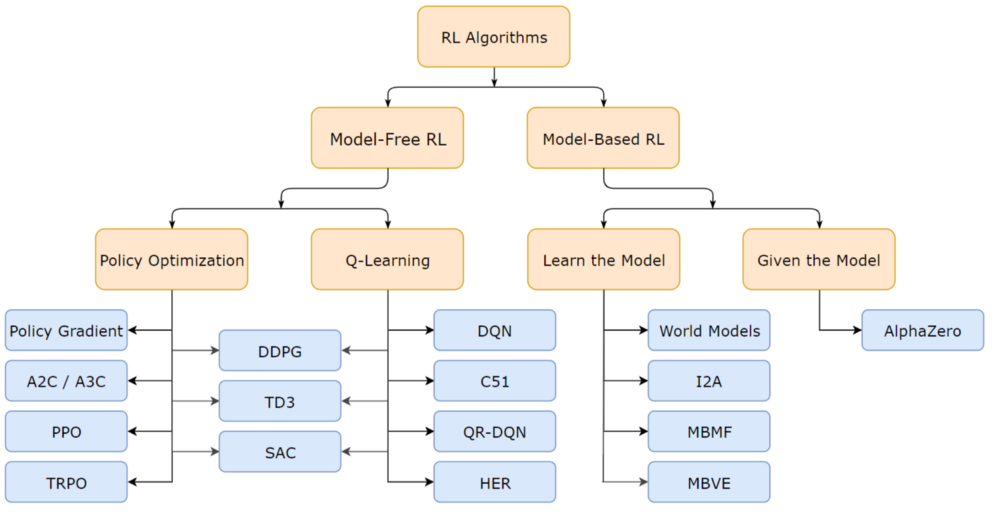

[Image source](https://smartlabai.medium.com/reinforcement-learning-algorithms-an-intuitive-overview-904e2dff5bbc)

In this tutorial we will explore reinforcement learning using the [Taxi problem](https://arxiv.org/abs/cs/9905014) introduced by Ditterich in 1999. 

In [1]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Command to install gym, DO NOT CHANGE
import sys
!{sys.executable} -m pip install gym

The taxi problem in openai/gym is characterized by a grid of 25 cells. This grid has 4 locations designated by 4 letters: R(red), B(blue), G(green) and Y(yellow). A passenger is located randomly at one of these four locations and wishes to be transported to another one of the four locations. The taxi needs to drive to the passenger location, pick them up, drive them to their destination and drop them off. The taxi is supposed to operate in the environment (grid) without hitting the walls (the passenger wishes to live longer). 

    +---------+
    |R: | : :G|
    | : : : : |
    | : : : : |
    | | : | : |
    |Y| : |B: |
    +---------+

There are 6 actions in this problem:  


*   0: move south
*   1: move north
*   2: move east
*   3: move west 
*   4: pickup passenger
*   5: drop off passenger

The rewards are defined as follows: 
* Successful dropoff: +20 points
* Illegal pickup/dropoff: -10 points
* Every other action: -1 point

The grid rendering uses the scheme below: 
* blue: passenger
* magenta: destination
* yellow: empty taxi
* green: full taxi

In [2]:
# Importing the libraries needed for our problem
import gym
import numpy as np

## Creating the environment
Now we can create our environment by simply running the commands given below. When you run the env.reset() command, you'll see the task we will be working on in this homework. 

In [3]:
# Create the environment 
env = gym.make('Taxi-v3')
env.reset()
env.render() 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## About the gym interface
There are three main operations that you can execute in this environment. We already used two of them

* __env.reset()__ : resets the environment to its initial state. It returns an initial observation
* __env.render()__ : outputs the current state of the environment
* __env.step(action)__ : performs an action and returns 4 values 
 * _observation_ : an object to represent your environment
 * _reward_ : reward gained from performing the last action
 * _done_ : True of false for whether the environment finished its tasks or not. 
 * _info_ : Extra information that you don't have to worry about for now. 
 
For further information about gym, please consider checking their website https://gym.openai.com/
 
The space of observations and actions in gym is already defined. Run the next commands to discover how these spaces look like in this problem. 

In [ ]:
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

As you can see, there are 500 states and 6 actions in your environment.

Play around with all possible actions (i.e. 0 through 5)

In [ ]:
# TODO: experiment with the six actions in the env.action_space.
# (i.e.  just run each action and then render to show the result)
# Hint: env.step(action_number) performs an action.
#       env.render() shows the current state



**What do you see?** 

**Where does 500 come from?**

## Play time
As a first introduction to this problem, try to run 1000 random steps. You're not expected to do Q-learning while doing that. Just play the game :)

In [ ]:
gains = list()            # to collect total rewards (gains)
rewards = list()          # to collect immediate rewards
iterations = list()       # to collect iterations

state = env.reset()        # resets the environment and returns an initial state
gain, reward = 0, 0     

# TODO - BEGIN: run a thousand steps. Every 10th step, record the iteration number, 
#       current reward, and current sum of rewards (gain) in the above defined lists.



# TODO - END

Now let's plot the results. The plotting function aloready provided for you. 

In [ ]:
def plotRewardsAndGains(iterations, rewards, gains):
    matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
    plt.figure(1)
    
    plt.subplot(121)
    plt.plot(iterations, rewards, 'x');
    plt.xlabel('iterations'); plt.ylabel('rewards');
    
    plt.subplot(122)
    plt.plot(iterations, gains);
    plt.xlabel('iterations'); plt.ylabel('gain');

    plt.show();

In [ ]:
# print the rewards and gains across iterations        
plotRewardsAndGains(iterations, rewards, gains)

## Training using Q-Learning

Now we will try to train our model using a better strategy than brute force. We will use Q-Learning which is a model-free algorithm. 

Q stands for quality. So given a state s and an action a, Q*(s,a) estimates a value that represents how useful the action a is in gaining future reward. 

The Q-function uses Bellman equation to estimate the expected reward which is stored in a Q-table. 

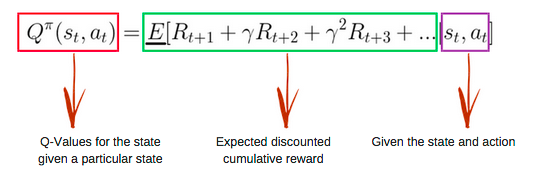

[Image source](https://www.freecodecamp.org/news/an-introduction-to-q-learning-reinforcement-learning-14ac0b4493cc/)

In [ ]:
state = env.reset()
Q = np.zeros([env.observation_space.n, env.action_space.n])

The heart of Q-Learning relies on updating the Q-values of the best policy. This is calculated using the weighted average of the old Q-value and the new information. Write a function that performs this operation for only one entry in the Q-matrix (that is for one state and one action). The input of the function is not given, however it needs to return a new value for Q(state, action) at a certain iteration. (Hint: this formula is based on Bellman equation and was discussed in class) 

In [ ]:
def compute_q_sample(Q, currState, currAction, newState, reward, lr, discount):
    """
        Input:
            Q          : a SxA matrix, where S is the number of states and A is the number of actions
            currState  : the current state
            currAction : the current action taken
            newState   : the new state resulting from 'currAction' on 'currState'
            reward     : the immediate reward
            lr         : the learning rate
            discount   : the discount factor
            
        Output:
            The sample value for updating Q. Look at the Q-learning algorithm discussed in class 
    """

    val = 0;
    
    # TODO: Implement your code here
    

    return val;
    

The function you just implemented only updates one cell in the Q-matrix. In the Q-learning algorithm, you'll need to "solve" the problem for each episode. "Solve" is loosely defined here to indicate reaching an end state. For instance the Taxi problem reaches an end state when the passenger is dropped off however solving the problem means getting an average reward of 9.6 over 100 consecutive trials. 

Your next task is to implement one episode of this problem. The episode has the following steps
* Start from an initial state
* While game not done
 * Greedily select one action 
 * Using this action, go to the next state
 * Compute Q(state, action) 
 * Update the state and total gain


In [ ]:
def RunSingleQLearningEpisode(Q, env):
    """ Run Q-learning on a single episode and update the Q-table

        Input:
            Q     : a SxA matrix, where S is the number of states and A is the number of actions
            env   : the RL environment 
            
        Output:
            [gain, finalState] 
                A tuple containing the total gain (sum of rewards) and the final state reached
    """
    
    state = env.reset();
    gain = 0;
    finalState = None;
    learning_rate = 0.6;
    discount = 0.9;
    
    # TODO: Your code here
    
    return [gain, finalState];


Now, we're ready to run this episode many times to teach our agent what the optimal policy would be. Train your algorithm for 10000 iterations and print the total gain every 100 steps. 

In [ ]:

state = env.reset()
counter = 0
reward = None

gains = list();
epochs = list();

Q = np.zeros([env.observation_space.n, env.action_space.n])

# TODO: Implement your code here. Run the above function 'RunSingleQLearningEpisode' 10000 times on Q.
# Every 100 times, print the total reward and render the environment.
# Also, every 100 times, add the iteration number to 'epochs' and the total reward of that iteration to 'gains'

        

In [ ]:
plt.plot(epochs, gains);
plt.xlabel('epochs');
plt.ylabel('gain')
plt.show()

The Q-Learning algorithm converges to the optimal policy. This means that using the Q matrix, you're expected to find the optimal policy for any starting state. Your final task is to find the optimal policy a random starting state. Print the state, sequence of actions and the final total gain. Comment on the result using plain English

In [ ]:

def PlaySingleGame(Q, env):
    """ Run Q-learning on a single episode and update the Q-table

        Input:
            Q     : a SxA matrix, where S is the number of states and A is the number of actions
            env   : the RL environment 
    """
    
    currState = env.reset()
    totalGain = 0;               # total gain accumulated across game
    
    # show initial state
    env.render()

    # TODO: Run a game from start to end. Print the action taken at each step
    
    
    
    
    # show final state
    env.render()    
    print "Total Gain = ", totalGain


    

In [ ]:
PlaySingleGame(Q,env)

Result discussion goes here.